Import Necassary Libraries

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Loading the dataset and seeing the class names

In [58]:
iris = load_iris()
X = iris.data
y = iris.target
classes = np.unique(y)

print(classes)

[0 1 2]


Function to convert numerical to real class names

In [62]:
obj = {
    0.0: "setosa",
    1.0: "versicolor",
    2.0: "virginica"
}

def get_label(i):
  return obj[i]

Creating a dataframe from above numpy nd arrays and checking the columns data

In [66]:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target']).sample(frac=1)
iris_df["target"] = iris_df["target"].apply(get_label)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 79 to 136
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Visualizing the first few rows of dataframe

In [67]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
79,5.7,2.6,3.5,1.0,versicolor
86,6.7,3.1,4.7,1.5,versicolor
133,6.3,2.8,5.1,1.5,virginica
131,7.9,3.8,6.4,2.0,virginica
98,5.1,2.5,3.0,1.1,versicolor


Checking if it has any duplicate values

In [68]:
iris_df.duplicated().sum()

1

Removing the duplicate values

In [69]:
iris_df.drop_duplicates(subset=None, keep='first', inplace=True)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 79 to 136
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Checking the count and balance of class labels

[0 1 2]


<Axes: xlabel='target', ylabel='count'>

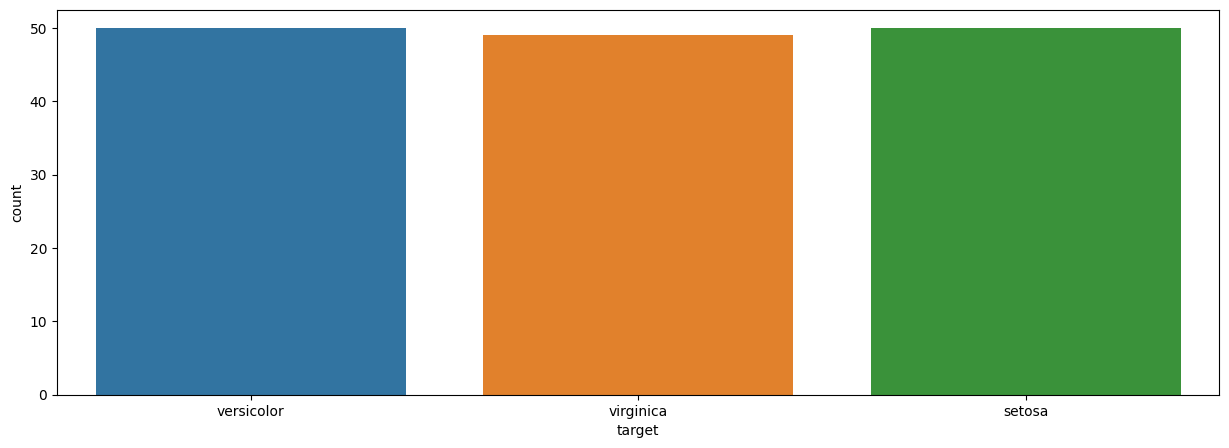

In [70]:
# visualize the Label count
print(classes)
plt.figure(figsize=(15,5))
sns.countplot(x = "target", data = iris_df)

Check the relationship of columns with eachother using graph

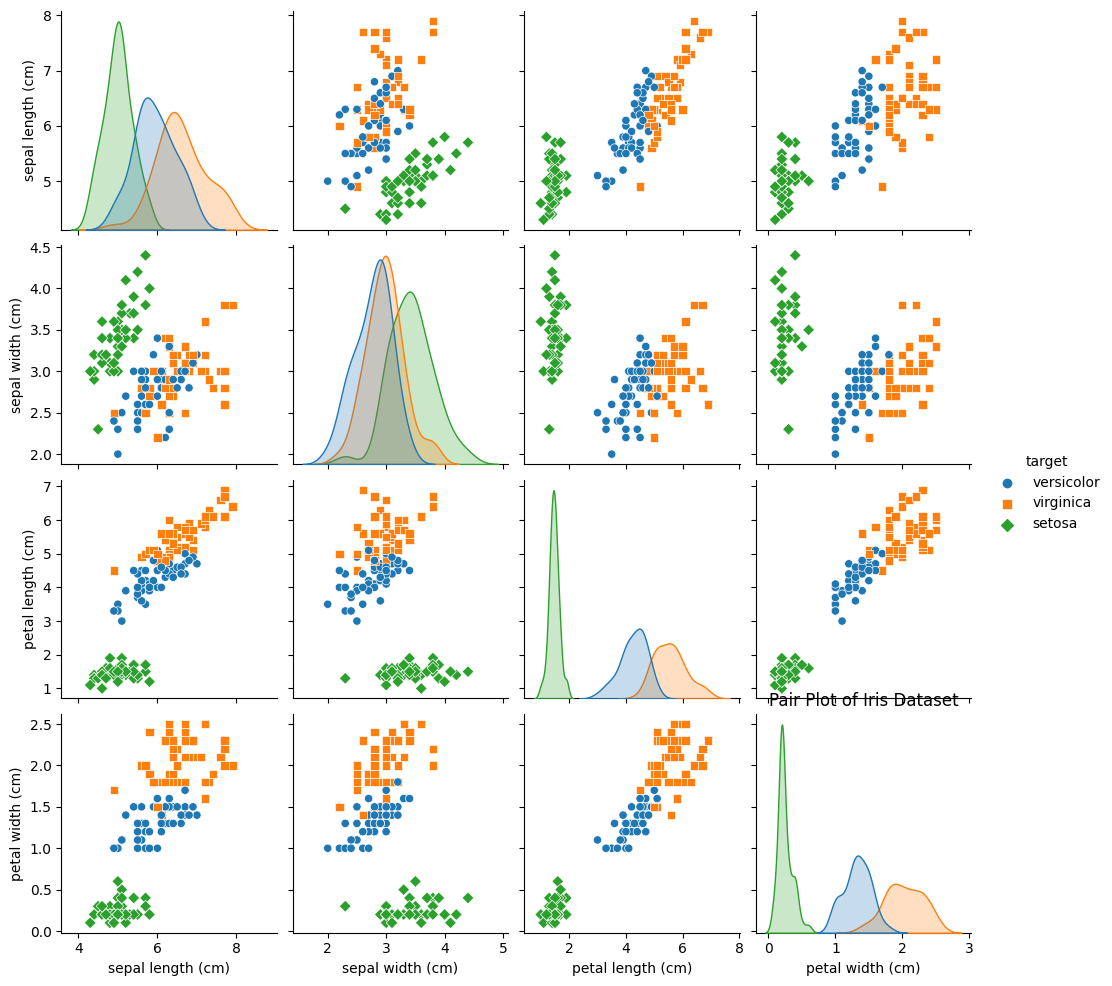

In [71]:
sns.pairplot(iris_df, hue='target', markers=["o", "s", "D"])
plt.title("Pair Plot of Iris Dataset")
plt.show()

Check the distribution of input features

<Axes: >

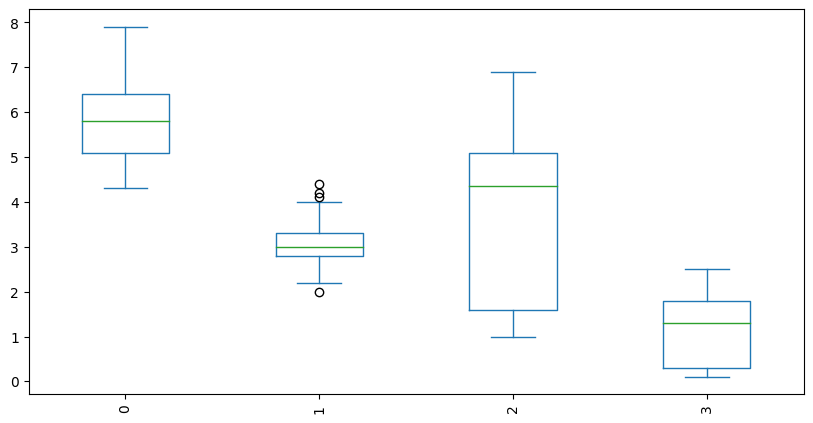

In [72]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
pd.DataFrame(X).plot.box(rot = 90)

In [87]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

In [88]:
le = LabelEncoder()
iris_df['target'] = le.fit_transform(iris_df['target'])

Standardize the input feature and then visaulizing it again

In [89]:
# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

<Axes: >

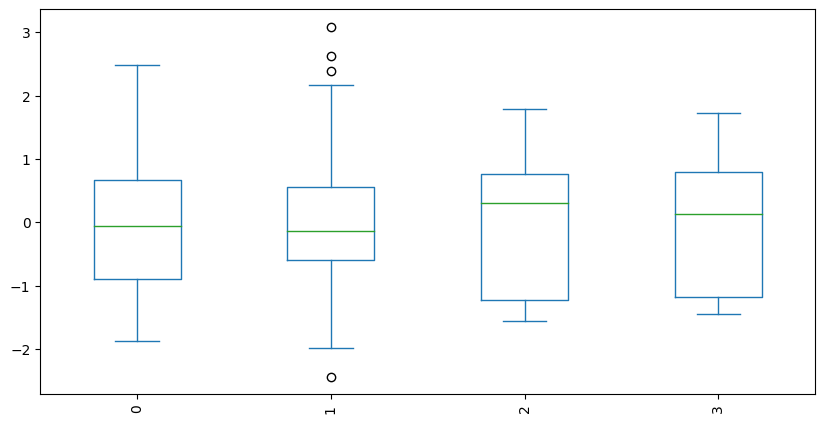

In [90]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
pd.DataFrame(X).plot.box(rot = 90)

Dividing the dataset into train and test split

In [91]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating LR Model and training on train data

In [92]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluating the model

In [93]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

1.0


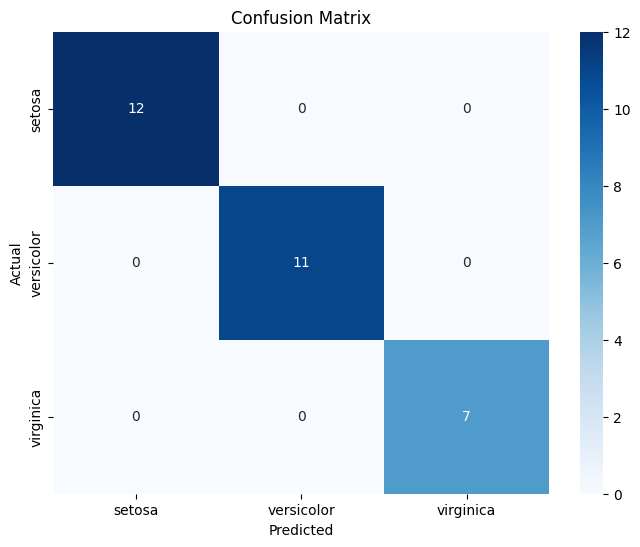

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_names = list(map(get_label, classes))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

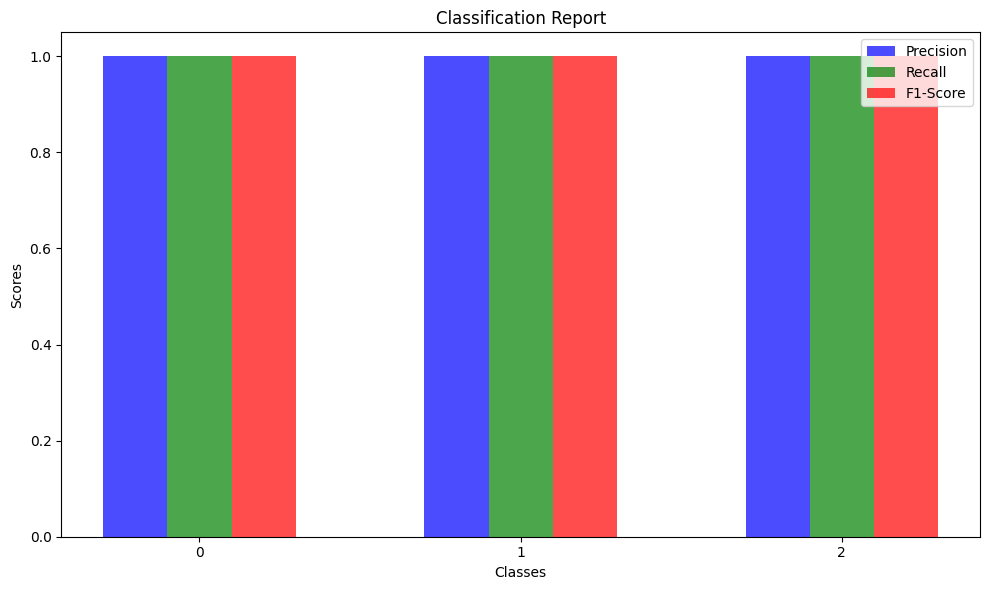

In [103]:
report_dict = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

# Extract precision, recall, and F1-score for each class
# class_names = list(classes)
precisions = [report_dict[class_name]['precision'] for class_name in class_names]
recalls = [report_dict[class_name]['recall'] for class_name in class_names]
f1_scores = [report_dict[class_name]['f1-score'] for class_name in class_names]

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, precisions, bar_width, label='Precision', color='b', alpha=0.7)
plt.bar(index + bar_width, recalls, bar_width, label='Recall', color='g', alpha=0.7)
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1-Score', color='r', alpha=0.7)

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report')
plt.xticks(index + bar_width, class_names)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [108]:
# Prediction (You can create a function or a user interface for this)
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example new data point
predicted_class = model.predict(new_data)
print(f"Predicted class for new data: {get_label(predicted_class[0])}")

Predicted class for new data: versicolor


Saving the model

In [109]:
import joblib

joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']

In [110]:
# Load the model from the file
loaded_model = joblib.load('iris_model.pkl')

In [111]:
loaded_model

LogisticRegression()